[0.         0.26666667 0.53333333 0.8        1.06666667 1.33333333
 1.6        1.86666667 2.13333333 2.4        2.66666667 2.93333333
 3.2        3.46666667 3.73333333 4.         4.26666667 4.53333333
 4.8        5.06666667 5.33333333 5.6        5.86666667 6.13333333
 6.4        6.66666667 6.93333333 7.2        7.46666667 7.73333333]


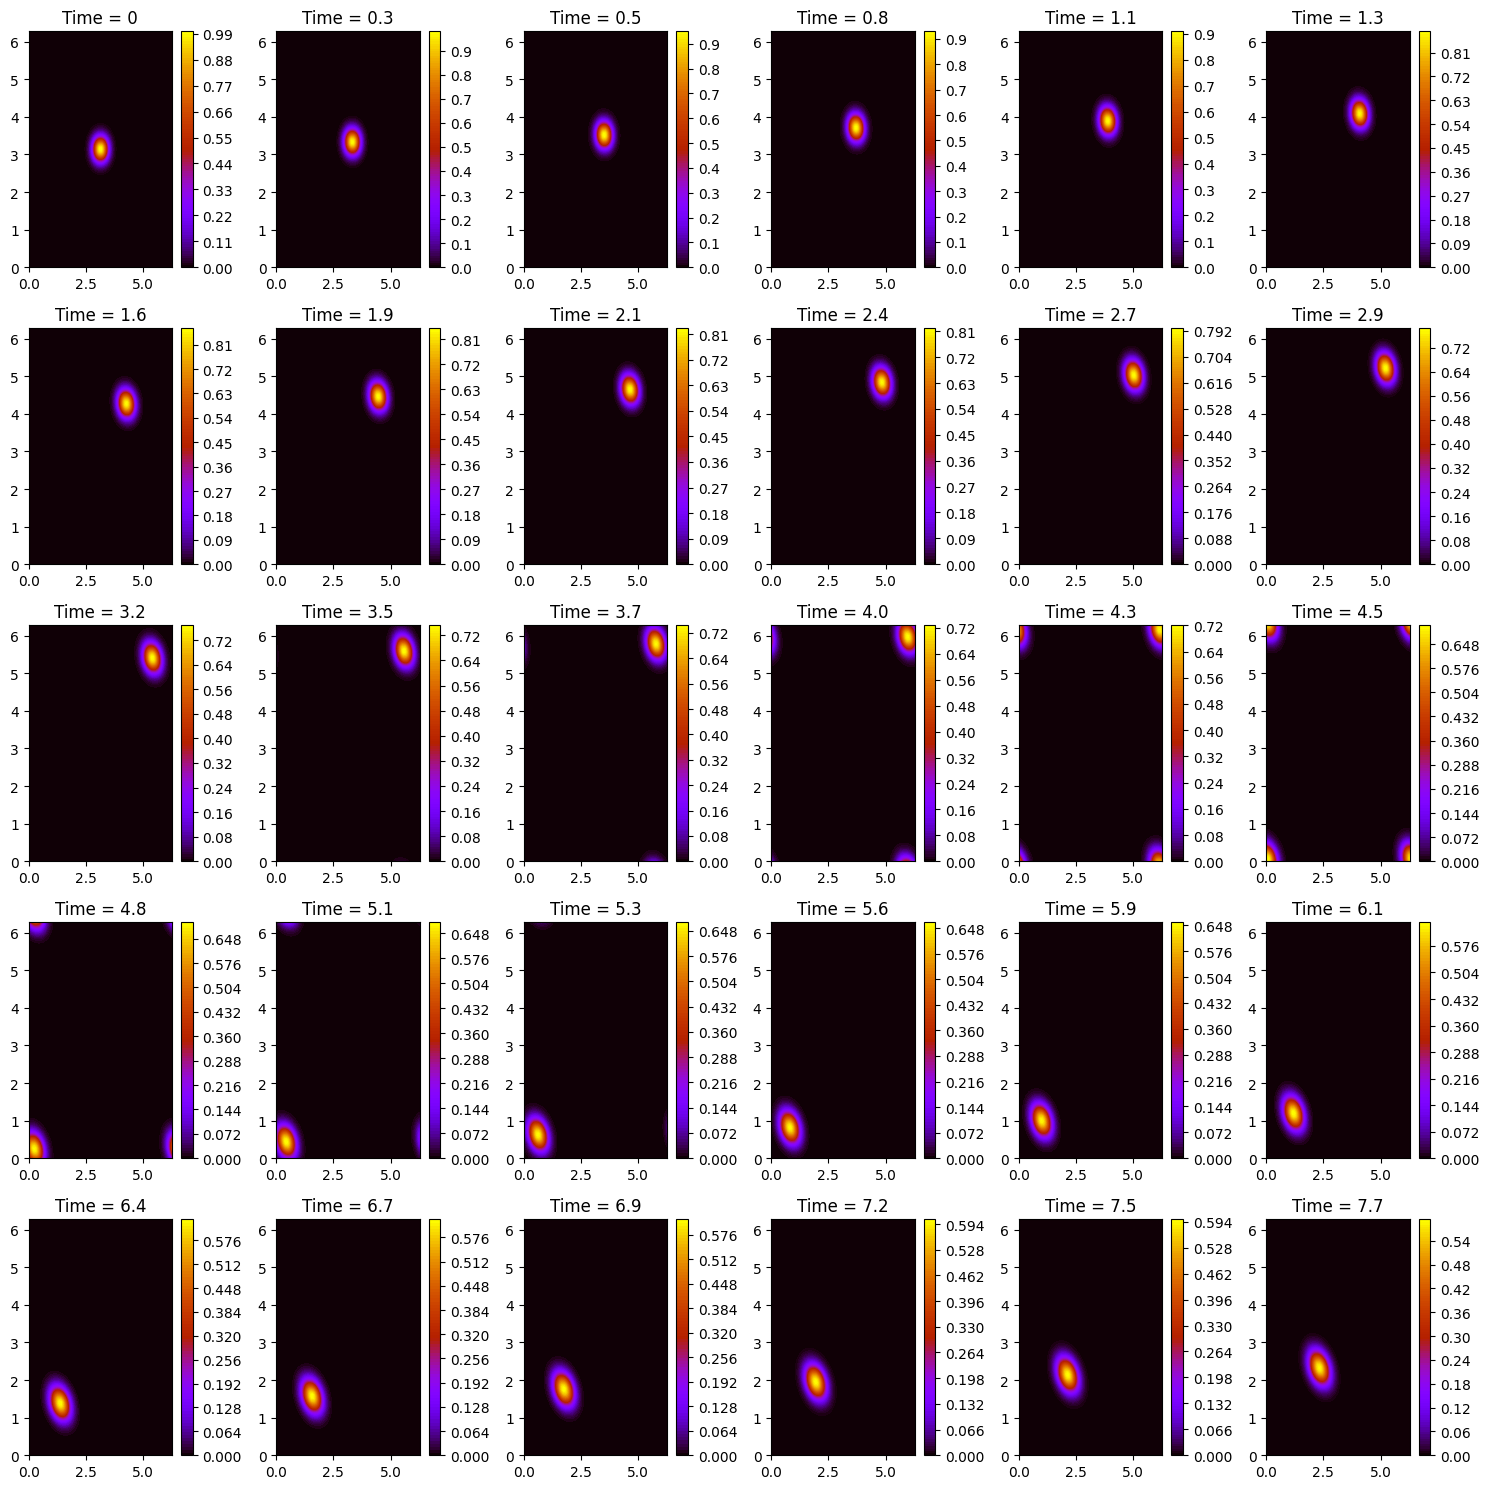

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 500                  # Number of spatial grid points
L = 2 * np.pi            # Domain size
dx = L / N               # Spatial step size
dt = 0.0075                # Time step size
T = 8.0                  # Final time
b = np.array([1.0/np.sqrt(2.0), 1.0/np.sqrt(2.0)])     # Advection velocity
n_steps = int(T / dt)    # Number of time steps
snapshot_times = np.linspace(0,8,30,endpoint=False)#[0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]  # Times at which to take snapshots
print(snapshot_times)
# Discretized spatial domain
x = np.linspace(0, L, N, endpoint=False)
y = np.linspace(0, L, N, endpoint=False)
X, Y = np.meshgrid(x, y)

# Initial condition (e.g., a Gaussian)
def initial_condition(x, y):
    return np.exp(-10 * ((x - np.pi)**2 + (y - np.pi)**2))

u = initial_condition(X, Y)

# Periodic boundary helper functions
def periodic_idx(i, N):
    return i % N

# Upwind method
def upwind(u, b, dx, dt):
    u_new = np.copy(u)
    for i in range(N):
        for j in range(N):
            # Indices for upwind scheme
            im = periodic_idx(i - 1, N)
            jm = periodic_idx(j - 1, N)
            
            # Upwind differences
            du_dx = (u[i, j] - u[im, j]) / dx if b[0] > 0 else (u[periodic_idx(i + 1, N), j] - u[i, j]) / dx
            du_dy = (u[i, j] - u[i, jm]) / dx if b[1] > 0 else (u[i, periodic_idx(j + 1, N)] - u[i, j]) / dx
            
            # Update u_new
            u_new[i, j] = u[i, j] - dt * (b[0] * du_dx + b[1] * du_dy)
    
    return u_new

# Plotting initial condition
plt.figure(figsize=(15, 15))
plt.subplot(5, 6, 1)
plt.contourf(X, Y, u, 100, cmap='gnuplot')
plt.colorbar()
plt.title('Time = 0')

# Time-stepping loop with snapshots
snapshot_idx = 2
current_time = 0.0

for n in range(n_steps):
    u = upwind(u, b, dx, dt)
    current_time += dt
    # Plot snapshots at specified times
    if np.isclose(current_time, snapshot_times[snapshot_idx - 1], atol=dt / 2):
        plt.subplot(5, 6, snapshot_idx)
        plt.contourf(X, Y, u, 100, cmap='gnuplot')
        plt.colorbar()
        plt.title(f'Time = {current_time:.1f}')
        snapshot_idx += 1

    # Stop the loop once all snapshots are captured
    if snapshot_idx > len(snapshot_times):
        break

# Adjust layout and show all plots
plt.tight_layout()
plt.show()
